<a href="https://colab.research.google.com/github/pheb2014939ctu/Clothes_Selling_Website/blob/main/DTree_underandover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount("/content/drive")
path = '/content/drive/MyDrive/0.Luận văn tốt nghiệp /Android_RansomewareOverSALL1.csv'
df=pd.read_csv(path)
df.head(5)
print(df.columns)

num_records = len(df)
print(f"Number of records: {num_records}")

Mounted at /content/drive
Index(['Flow ID', 'Source IP', 'Source Port', 'Destination IP',
       'Destination Port', 'Protocol', 'Flow Duration',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Bwd Packet Length Min', 'Init_Win_bytes_forward',
       'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward',
       'Active Mean', 'Active Std', 'Active Max', 'Idle Mean', 'Idle Std',
       'Label'],
      dtype='object')
Number of records: 697886


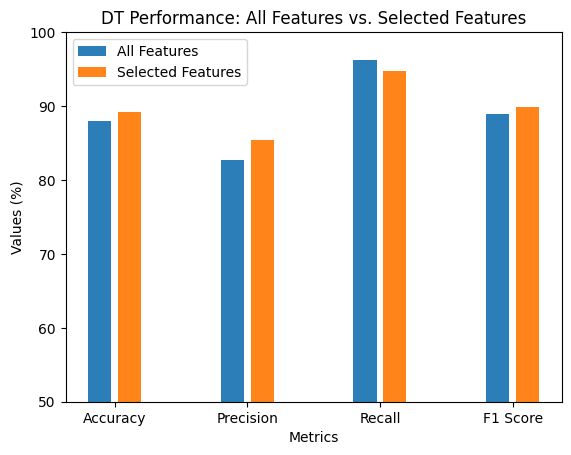

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the metric names
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Define the metric values for all features
all_metrics = [87.97, 82.66, 96.19, 88.91]

# Define the metric values for selected features
selected_metrics = [89.26, 85.40, 94.78, 89.85]

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis with increased gaps
r1 = np.arange(len(metric_names)) * 2
r2 = [x + bar_width + 0.1 for x in r1]
# Calculate the center position for metric names
metric_names_center = [(r1[i] + r2[i]) / 2 for i in range(len(r1))]

plt.bar(r1, all_metrics, width=bar_width, alpha=0.95, label='All Features')
plt.bar(r2, selected_metrics, width=bar_width, alpha=0.95,label='Selected Features')
# Add labels, title, and x-axis tick labels
plt.xlabel('Metrics')
plt.ylabel('Values (%)')
plt.title('DT Performance: All Features vs. Selected Features')
plt.xticks(metric_names_center, metric_names)

# Set the y-axis range to include the full range of metric values
plt.ylim(50, 100)

# Add a legend
plt.legend()

# Show the plot
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392034 entries, 0 to 392033
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Flow ID                      392034 non-null  int64  
 1   Source IP                    392034 non-null  int64  
 2   Source Port                  392034 non-null  int64  
 3   Destination IP               392034 non-null  int64  
 4   Destination Port             392034 non-null  int64  
 5   Protocol                     392034 non-null  int64  
 6   Flow Duration                392034 non-null  int64  
 7   Total Fwd Packets            392034 non-null  int64  
 8   Total Backward Packets       392034 non-null  int64  
 9   Total Length of Fwd Packets  392034 non-null  int64  
 10  Total Length of Bwd Packets  392034 non-null  int64  
 11  Fwd Packet Length Max        392034 non-null  int64  
 12  Fwd Packet Length Min        392034 non-null  int64  
 13 

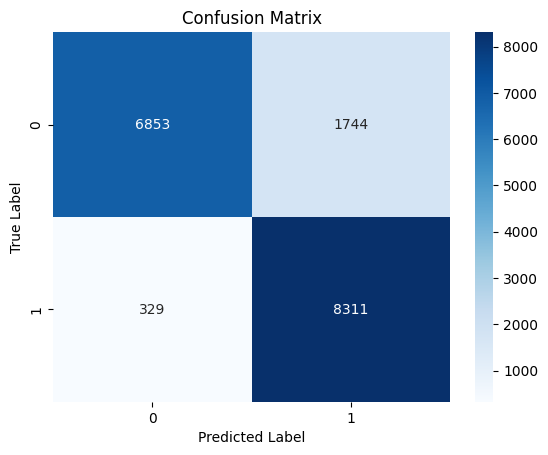

In [ ]:
#new under sampleling
#=======================================================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from imblearn.under_sampling import NearMiss
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
path = '/content/drive/MyDrive/0.Luận văn tốt nghiệp /Android_Ransomeware_undersample_all.csv'
df = pd.read_csv(path)

print(df.info())

# Prepare the data
X = df.drop('Label', axis=1)
y = df['Label']

# Apply NearMiss for under-sampling the majority class
nm = NearMiss(version=1)  # You can try version 1, 2, or 3
X_res, y_res = nm.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Initialize the model
# clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=1)
clf = DecisionTreeClassifier(max_depth=15, min_samples_split=2, min_samples_leaf=15, random_state=1, class_weight='balanced')

# Train the model
clf.fit(X_train, y_train)

# Predict on the test set
y_test_pred = clf.predict(X_test)

# Evaluate the model on test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Evaluate precision, recall, and F1-score
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
cm = confusion_matrix(y_test, y_test_pred)

# Print evaluation metrics
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')
print(f'Confusion Matrix:\n{cm}')
print(classification_report(y_test, y_test_pred))

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
#==================================================================

<class 'pandas.core.frame.DataFrame'>
Index: 392034 entries, 0 to 392033
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Flow ID                  392034 non-null  int64  
 1   Source IP                392034 non-null  int64  
 2   Source Port              392034 non-null  int64  
 3   Destination IP           392034 non-null  int64  
 4   Destination Port         392034 non-null  int64  
 5   Protocol                 392034 non-null  int64  
 6   Flow Duration            392034 non-null  int64  
 7   Fwd Packet Length Max    392034 non-null  float64
 8   Fwd Packet Length Min    392034 non-null  float64
 9   Bwd Packet Length Min    392034 non-null  float64
 10  Init_Win_bytes_forward   392034 non-null  int64  
 11  Init_Win_bytes_backward  392034 non-null  int64  
 12  act_data_pkt_fwd         392034 non-null  int64  
 13  min_seg_size_forward     392034 non-null  int64  
 14  Active Me

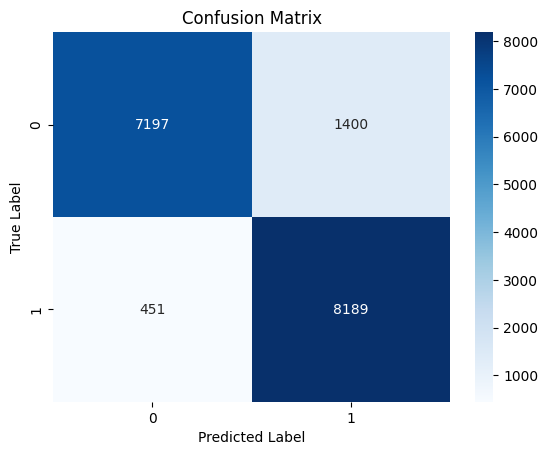

In [ ]:
#new under sampleling
#=======================================================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from imblearn.under_sampling import NearMiss
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
path = '/content/drive/MyDrive/0.Luận văn tốt nghiệp /0Android_Ransomeware19.csv'
df = pd.read_csv(path, index_col=0)

print(df.info())

# Prepare the data
X = df.drop('Label', axis=1)
y = df['Label']

# Apply NearMiss for under-sampling the majority class
nm = NearMiss(version=1)  # You can try version 1, 2, or 3
X_res, y_res = nm.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Initialize the model
# clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=1)
clf = DecisionTreeClassifier(max_depth=15, min_samples_split=2, min_samples_leaf=15, random_state=1, class_weight='balanced')

# Train the model
clf.fit(X_train, y_train)

# Predict on the test set
y_test_pred = clf.predict(X_test)

# Evaluate the model on test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Evaluate precision, recall, and F1-score
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
cm = confusion_matrix(y_test, y_test_pred)

# Print evaluation metrics
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')
print(f'Confusion Matrix:\n{cm}')
print(classification_report(y_test, y_test_pred))

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
#==================================================================